# Minimal network for basophil lineage commitment

In this tutorial, we will reveal a regulatory network governing the Bas lineage's dual origins

Import relevant packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import Scribe as sb
import sys
import os

# import scanpy as sc
import dynamo as dyn
import seaborn as sns

dyn.dynamo_logger.main_silence()


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/Users/random/opt/anaconda3/envs/dynamo-dev/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
adata_labeling = dyn.sample_data.hematopoiesis()


## Regulatory network governing the Bas lineage’s dual origins

In this section, we will show

- GATA2 has high expression in the Bas lineage
- CEBPA represses RUNX1 and GATA2
- A minimal network governing GMP vs. Bas origin of Bas lineage

GATA2 has high expression in the Bas lineage

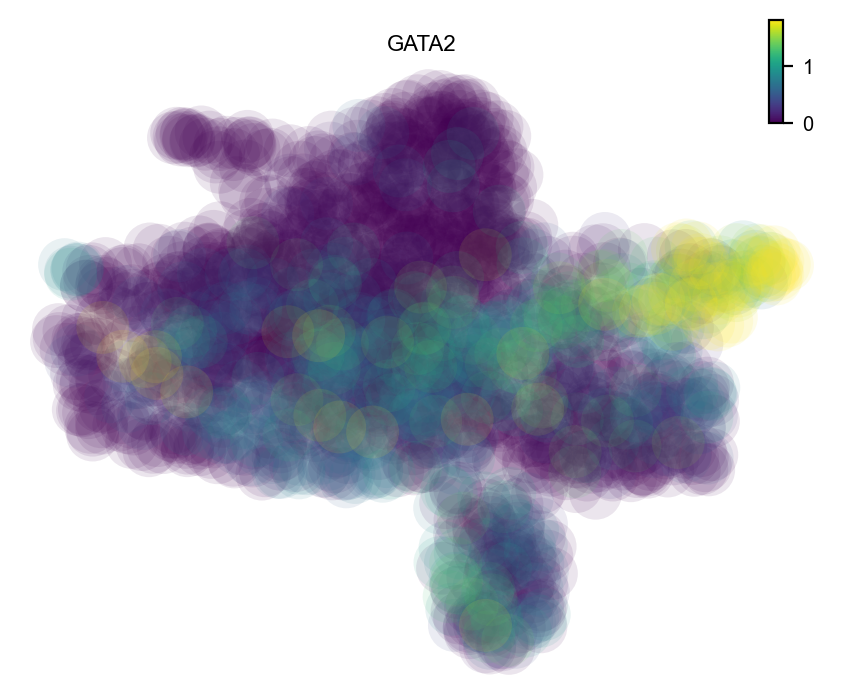

In [5]:
dyn.pl.scatters(adata_labeling, color="GATA2")


Next, we will calculate jacobian via `dyn.vf.jacobian` and then show that CEBPA represses RUNX1 and GATA2.

/Users/random/opt/anaconda3/envs/dynamo-dev/lib/python3.9/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
Transforming subset Jacobian: 100%|██████████| 1947/1947 [00:00<00:00, 93750.33it/s]
/Users/random/dynamo-release/dynamo/plot/vector_calculus.py:658: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


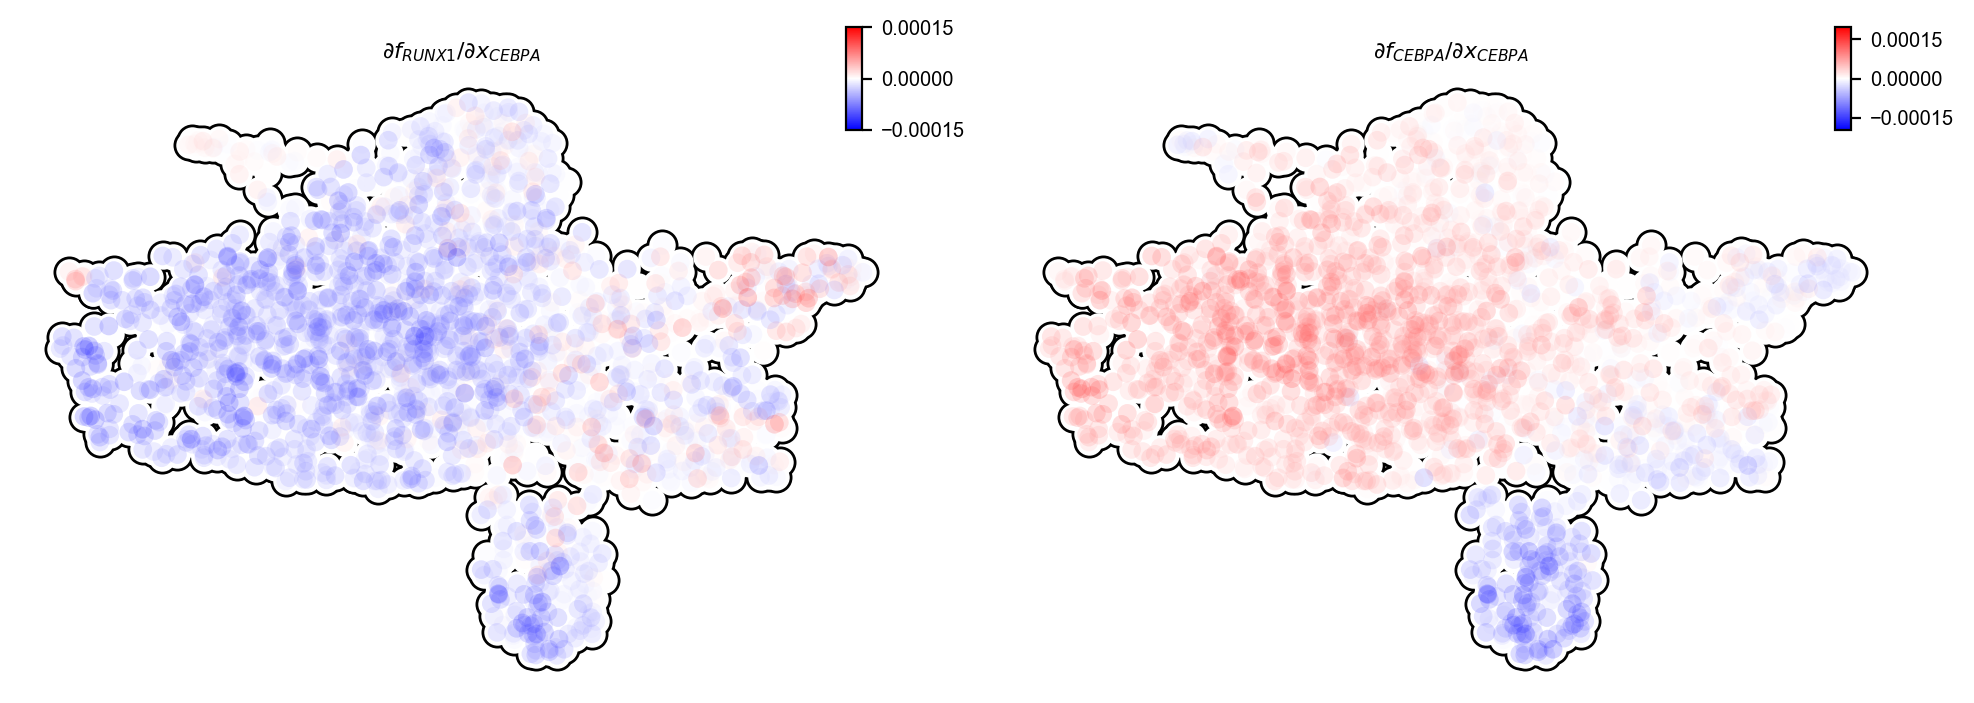

In [6]:
selected_genes = ["GATA2", "CEBPA", "RUNX1"]

dyn.vf.jacobian(adata_labeling, regulators=selected_genes, effectors=selected_genes)
dyn.pl.jacobian(
    adata_labeling,
    regulators="CEBPA",
    effectors=["RUNX1", "CEBPA"],
    basis="umap"
)


### A minimal network governing GMP vs. Bas origin of Bas lineage

![fig5_g_iv](images/fig5_g_iv.png)